In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.value_counts()[0]

Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
57       60             0              0        21.7  0.735                     67   0          1
67       76             0              0        45.3  0.194                     46   0          1
181      88             44             510      43.3  0.222                     26   1          1
165      90             33             680      52.3  0.427                     23   0          1
167      0              0              0        32.3  0.839                     30   1          1
                                                                                               ..
126      84             29             215      30.7  0.520                     24   0          1
         86             27             120      27.4  0.515                     21   0          1
127      80             37             210      36.3  0.804                     23   0          1
128      68             1

In [ ]:
# df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
# for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'] :
#    df[i].fillna(value=df[i].mean(), inplace=True)

In [ ]:
 df.replace(0,df.mode(axis=1),inplace=True)
 #df.replace(0,df.mean(axis=1),inplace=True)

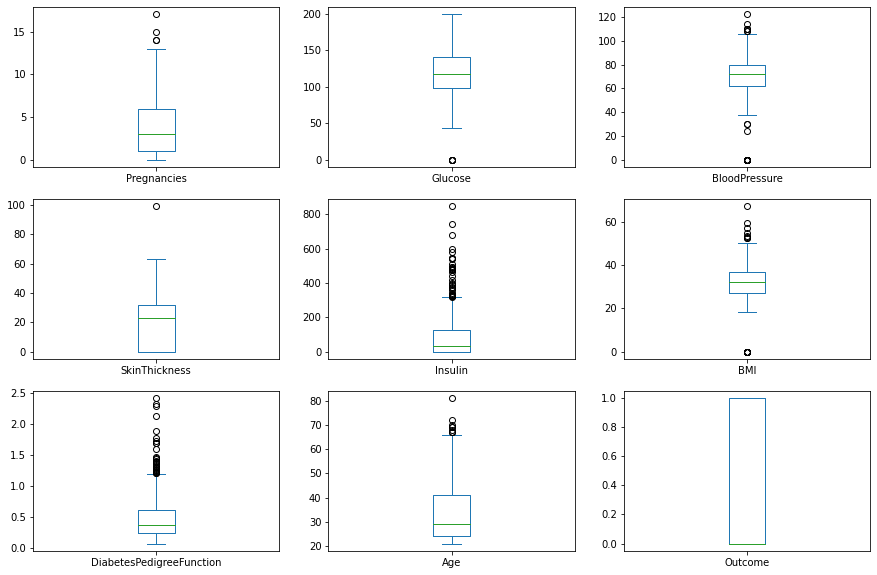

In [ ]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [ ]:
df.shape

(768, 9)

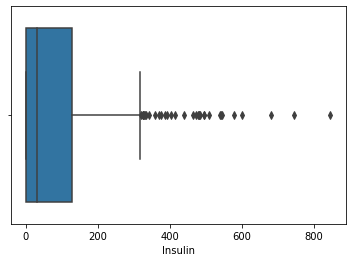

In [ ]:
sns.boxplot(df['Insulin'])

In [ ]:
percentile25Depth = df['Insulin'].quantile(0.25)
percentile75Depth = df['Insulin'].quantile(0.75)
iqr= percentile75Depth-percentile25Depth
print(percentile25Depth,percentile75Depth)



upper_limit = percentile75Depth + 1.5 * iqr
lower_limit = percentile25Depth - 1.5 * iqr
print(upper_limit, lower_limit)


df[df['Insulin'] > upper_limit]
df[df['Insulin'] < lower_limit]


df= df[df['Insulin'] < upper_limit]
df= df[df['Insulin']>lower_limit]

0.0 127.25
318.125 -190.875


In [ ]:
df.shape

(734, 9)

In [ ]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7278911564625851


**Conclusion:**

Successfully implemented Decision Tree Algorithm to predict the class of new data point using sklearn and obtain the accuracy rate.